In [261]:
# Python 3.9
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sk
import warnings

In [262]:
# file path for datasets

file_path = "https://raw.githubusercontent.com/sammon229/datdao/main/Tele%20Customer%20Churn%20Rate%20%20Prediction%20Using%20Python/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Reload the dataset to start fresh
data = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [263]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [264]:
# View data

data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check if there are any NaN values introduced by the conversion
nan_total_charges = data['TotalCharges'].isnull().sum()

# Optionally, handle NaN values, for example, by replacing them with the mean
if nan_total_charges > 0:
    mean_total_charges = data['TotalCharges'].mean()
    data['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Confirm the conversion
print(f"TotalCharges dtype after conversion: {data['TotalCharges'].dtype}")


TotalCharges dtype after conversion: float64


In [266]:
# Convert 'Yes' to 1 and 'No' to 0
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data[columns_to_convert] = data[columns_to_convert].replace({'Yes': 1, 'No': 0})

# Convert 'Female' to 1 and 'Male' to 0 in 'gender'
data['gender'] = data['gender'].replace({'Female': 1, 'Male': 0})

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})



In [267]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Start clean up process unnecessarily columns and using GridSearchCV for the best parameters to avoid overfitting

In [268]:
# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Calculate Cramér's V for all object-type columns against 'Churn'
object_columns = data.select_dtypes(include=['object']).columns
correlations = {}
for column in object_columns:
    if column != 'Churn':  # Exclude the target variable itself
        correlation = cramers_v(data[column], data['Churn'])
        correlations[column] = correlation

# Identify columns with correlation < 0.1
low_correlation_columns = [column for column, corr in correlations.items() if corr < 0.1]

# Remove these columns from the dataset
data_reduced = data.drop(columns=low_correlation_columns)

print(f"Removed columns: {low_correlation_columns}")
print(f"Remaining columns: {data_reduced.columns.tolist()}")


Removed columns: ['MultipleLines']
Remaining columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


C:\Users\danie\AppData\Local\Temp\ipykernel_12424\2833322114.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


In [292]:
# Check correlation
correlations

{'customerID': nan,
 'MultipleLines': 0.03639958908232507,
 'InternetService': 0.3220367323307425,
 'OnlineSecurity': 0.34701606688272874,
 'OnlineBackup': 0.291850036724674,
 'DeviceProtection': 0.28109492388964397,
 'TechSupport': 0.3425261587493695,
 'StreamingTV': 0.22990176915403474,
 'StreamingMovies': 0.23035147282444215,
 'Contract': 0.40979839182553446,
 'PaymentMethod': 0.3026771381187204}

In [269]:

# Ensure 'Churn' is present before calculating numerical correlations
if 'Churn' in data_reduced.columns:
    # Calculate correlations with 'Churn' for numerical features, setting numeric_only=True
    correlations_numerical = data_reduced.corr(numeric_only=True)['Churn'].abs()

    # Identify numerical features with correlation < 0.1
    low_correlation_numerical = correlations_numerical[correlations_numerical < 0.1].index.tolist()

    # Remove these numerical features from the dataset
    data_reduced = data_reduced.drop(columns=low_correlation_numerical)
else:
    print("'Churn' column is missing in the data_reduced DataFrame.")

# Display the removed features and remaining features
print(f"Removed numerical features: {low_correlation_numerical}")
print(f"Remaining features: {data_reduced.columns.tolist()}")


Removed numerical features: ['gender', 'PhoneService']
Remaining features: ['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [270]:
# Count the occurrences of each class in the 'Churn' column
churn_counts = data_reduced['Churn'].value_counts()

In [271]:
data_reduced['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [272]:
churn_counts

0    5174
1    1869
Name: Churn, dtype: int64

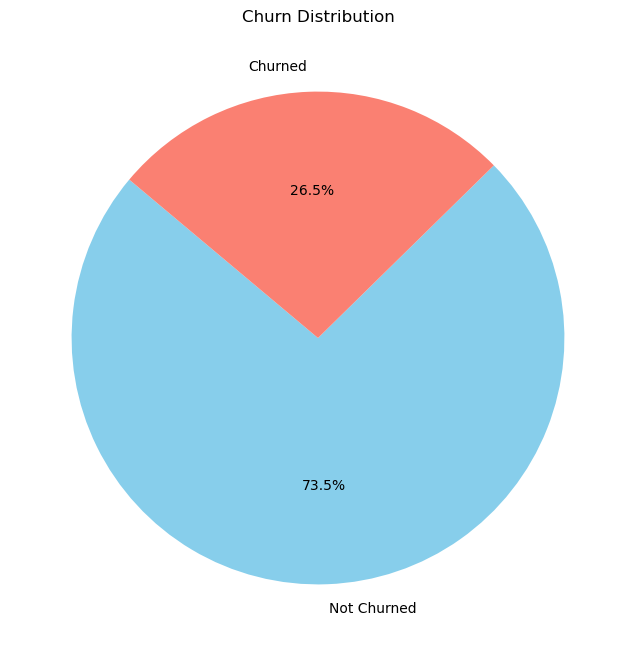

In [273]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_12424\502107713.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_reduced.corr()


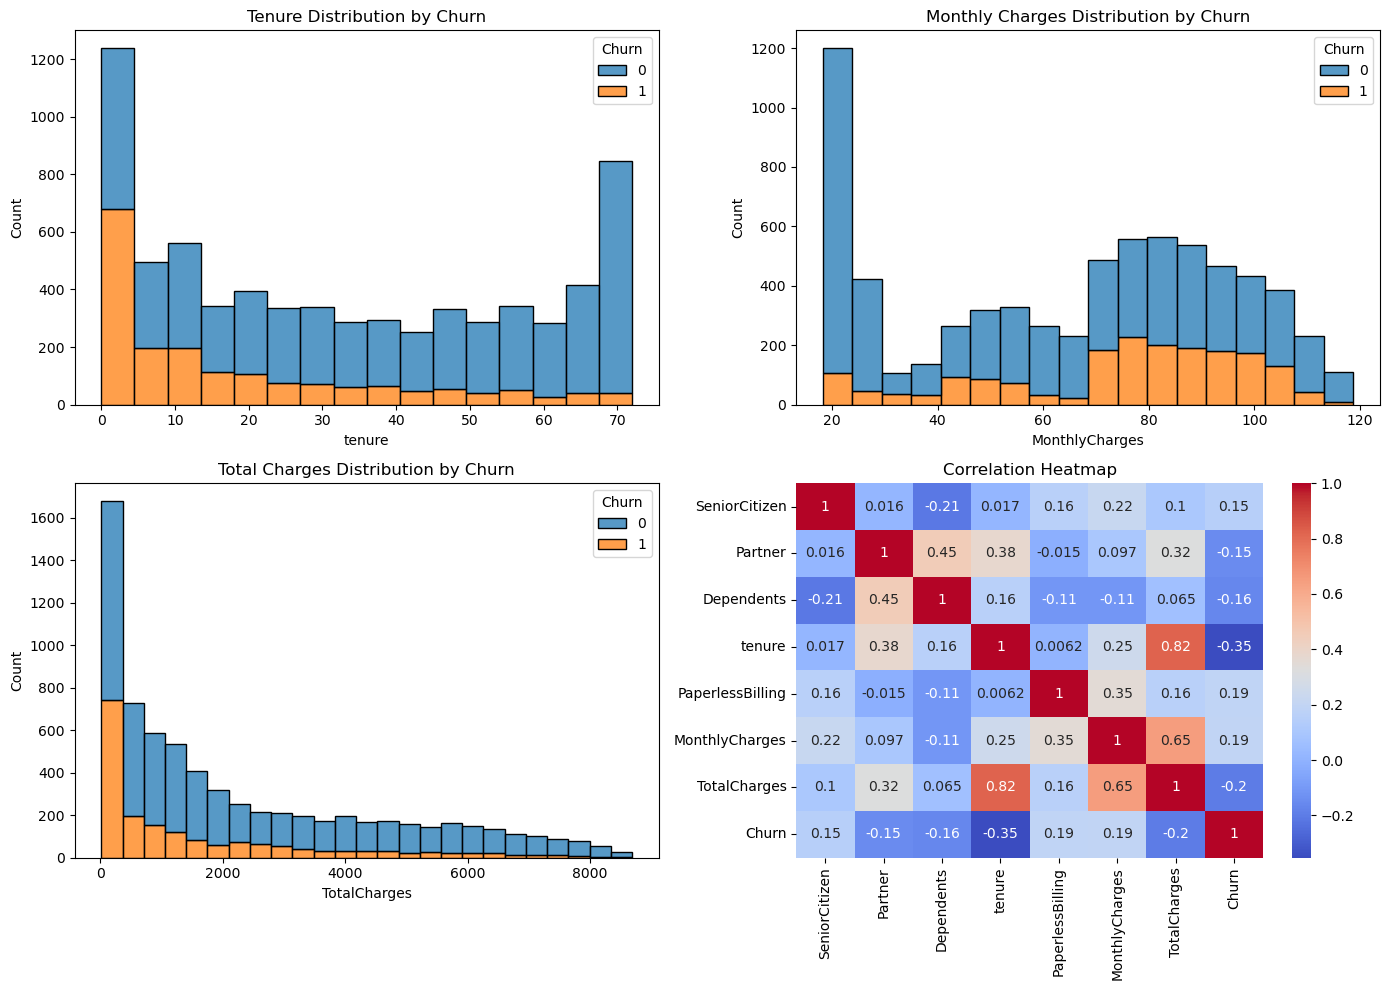

In [274]:

# Plot the distribution of key features and their relationship with Churn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Tenure distribution
sns.histplot(data=data_reduced, x='tenure', hue='Churn', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Tenure Distribution by Churn')

# MonthlyCharges distribution
sns.histplot(data=data_reduced, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges Distribution by Churn')

# TotalCharges distribution
sns.histplot(data=data_reduced, x='TotalCharges', hue='Churn', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('Total Charges Distribution by Churn')

# Correlation heatmap
# Convert categorical 'Churn' to numeric for correlation analysis
correlation = data_reduced.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()


In [275]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing and model pipeline setup
numerical_features = data_reduced.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
categorical_features = data_reduced.select_dtypes(include=['object']).columns.drop('customerID')

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data_reduced
X = data_reduced.drop(['Churn', 'customerID'], axis=1)
y = data_reduced['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [276]:
# Cross-validation and hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(model, param_grid, cv=5 ,scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best cross-validation score: 0.7941037129965123


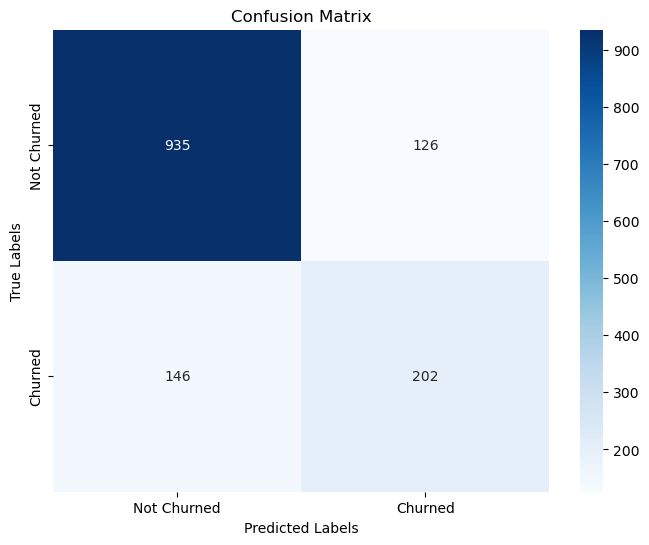

Accuracy: 0.8069552874378992


In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Identify categorical columns
categorical_cols = X.columns[X.dtypes == 'object']

# Preprocessing for numerical data: scale
# Preprocessing for categorical data: encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the classifier
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets before applying the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the pipeline to the training data
log_reg_pipeline.fit(X_train, y_train)

# Now you can directly use the pipeline to make predictions, which will
# automatically apply the preprocessing steps to the input data
y_pred = log_reg_pipeline.predict(X_test)


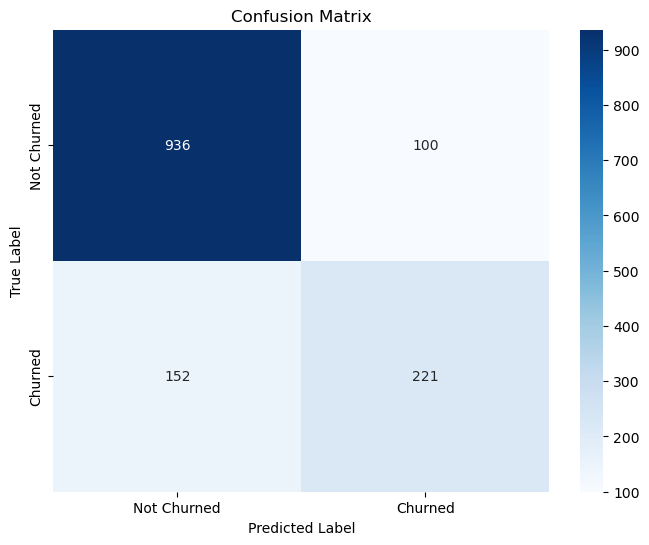

Accuracy (manual calculation): 0.8211497515968772
Accuracy (sklearn): 0.8211497515968772


In [283]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy from the confusion matrix
accuracy_sklearn = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy (sklearn): {accuracy_sklearn}")

In [288]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the LDA model
lda = LDA()

# Create a pipeline that includes preprocessing and the classifier
lda_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LDA())
])

# Fit the pipeline to the training data
lda_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = lda_reg_pipeline.predict(X_test)

# Confusion Matrix
lda_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", lda_conf_matrix)

# Classification Report
lda_class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", lda_class_report)

# Accuracy
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lda_accuracy}")


Confusion Matrix:
 [[923 113]
 [147 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.67      0.61      0.63       373

    accuracy                           0.82      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy: 0.815471965933286
